# Anwendungsbereich 2 
**Aufgabenstellung 1**

##  Einleitung:
Das Verhalten von Schwingungssystemen spielt eine wesentliche Rolle in verschiedenen Ingenieuranwendungen, insbesondere in der Mechanik und der Schwingungsanalyse. Ein klassisches Beispiel für ein solches System ist der [ungedämpfte Zweimassenschwinger](Herleitung_Zweimassenschwinger.ipynb). Dieses System besteht aus zwei Massen, die durch Federn miteinander und mit der Umgebung verbunden sind. Die Analyse des Zweimassenschwingers liefert Einblicke in das dynamische Verhalten von gekoppelten Schwingungssystemen, die in vielen praktischen Anwendungen, wie Fahrzeugaufhängungen, seismischen Isolatoren und mechanischen Resonatoren, zu finden sind.

In dieser Übung konzentrieren wir uns auf die numerische Lösung der Bewegungsgleichungen für einen ungedämpften Zweimassenschwinger. Durch die Verwendung von Python und relevanten Bibliotheken werden wir die Differentialgleichungen des Systems lösen und das Schwingungsverhalten visualisieren. Dies ermöglicht ein tieferes Verständnis der Schwingungsphänomene und die Fähigkeit, solche Systeme in der Praxis zu analysieren und zu optimieren.


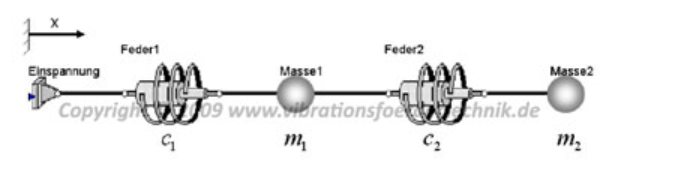

1. **Problemstellung:** 
     Analyse des dynamischen Verhaltens eines ungedämpften Zweimassenschwingers. Es soll die zeitabhängige Auslenkung der beiden Massen ermittelt werden, um das Schwingungsverhalten zu verstehen.
2. **Lösungssatz:**
    Verwendung eines numerischen Ansatzes zur Lösung der Differentialgleichungen, die das System beschreiben. Implementierung der Lösung in Python unter Nutzung von Bibliotheken wie numpy, scipy und matplotlib, um die Ergebnisse zu visualisieren.
3. **Voraussetzungen:***
- Grundkenntnisse in Python, insbesondere mit den Bibliotheken numpy und scipy.
- Grundkenntnisse in der numerischen Lösung von Differentialgleichungen.
- Grundkenntnisse in der grafischen Darstellung von Daten mit matplotlib.








**Fragen:**
1. Wie definieren wir die Anfangsbedingungen für ein Schwingungssystem?.Denken Sie an Anfangsauslenkung und Anfangsgeschwindigkeit. Welche Variablen repräsentieren diese Werte im Code? für die Eigenfrequenz $omega_{01}$, $omega_{02}$ können 1 und 2 angeben. Datenpunkte $=$ 1000 und maximale Zeitspanne beträgt 10 sek.
2. Welche physikalischen Größen repräsentieren omega01 und omega02 und warum sind sie wichtig?Wie können wir die Zeitspanne und die Anzahl der Datenpunkte für unsere Simulation festlegen?
3. Wie formulieren wir die Differentialgleichungen für ein ungedämpftes Zweimassenschwingersystem und wie können wir diese in Python implementieren?. Wie stellen wir sicher, dass die Lösung über den gesamten gewünschten Zeitraum berechnet wird?
(Hinweis:Wie setzen wir die Anfangsbedingungen für unser System im Code ?)

5. Wie verwenden wir Scipy, um die Differentialgleichungen numerisch zu lösen?.Extrahieren Sie die Ergebnisse der Lösung und bereiten sie für die grafische Darstellung vor.Stelle Sie diese grapfisch dar.

**Aufgabenbearbeitung:**

1. **Anforderungen:**
   - **Eingabe:**
     - Parameter des Systems: Eigenfrequenzen $omega_{01}$, $omega_{02}$, Anfangsauslenkungen $x_{1,0}$, $x_{2,0}$, Anfangsgeschwindigkeiten $\dot{x}_{1,0}$, $\dot{x}_{2,0}$, maximale Zeitspanne (`t_max`), Anzahl der zu berechnenden Datenpunkte (`n_points`).
   - **Ausgabe:**
     - Zeitverlauf der Auslenkungen $x_1(t)$ und $x_2(t)$ als Diagramm.

2. **Modellbildung:**
   - Beschreibung des ungedämpften Zweimassenschwingers durch ein System von gekoppelten Differentialgleichungen:
     \[
     \begin{cases}
     \ddot{x}_1 + (\omega_{01} + \omega_{02}) x_1 - \omega_{02} x_2 = 0 \\
     \ddot{x}_2 - \omega_{02} x_1 + \omega_{02} x_2 = 0
     \end{cases}
     \]
   - Festlegen der Anfangsbedingungen und Parameterwerte.

3. **Algorithmierung/Entwurf:**
   - Definition der Differentialgleichungen in einer Python-Funktion.
   - Verwendung der Funktion `solve_ivp` von `scipy.integrate`, um die Differentialgleichungen numerisch zu lösen.
   - Definition der Zeitspanne und der Anzahl der Berechnungspunkte für die Simulation.

4. **Implementierung:**
   - Schreiben des Python-Codes, der die Parameter einliest, die Differentialgleichungen definiert, die numerische Lösung berechnet und die Ergebnisse visualisiert.

5. **Anwendung und Test:**
   - Durchführung der Simulation mit den gegebenen Parametern.
   - Visualisierung der Ergebnisse und Interpretation der Schwingungsmuster.
   - Validierung der Ergebnisse durch Vergleich mit theoretischen Vorhersagen oder Referenzlösungen.

   

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd 

In [57]:
# Parameter direkt im Jupyter Notebook eingeben
omega01 = 1.0  # Eigenfrequenz der ersten Masse
omega02 = 2.0  # Eigenfrequenz der zweiten Masse
x1_0 = 1.0     # Anfangsauslenkung der ersten Masse
x2_0 = 0.0     # Anfangsauslenkung der zweiten Masse
v1_0 = 0.0     # Anfangsgeschwindigkeit der ersten Masse
v2_0 = 0.0     # Anfangsgeschwindigkeit der zweiten Masse
t_max = 10.0   # maximale Zeitspanne für die Berechnung
n_points = 1000 # Anzahl der zu berechnenden Datenpunkte

In [58]:

# Differentialgleichungen des ungedämpften Zweimassenschwingers
def zweimassenschwinger(t, y, omega01, omega02):
    x1, x2, v1, v2 = y
    dx1dt = v1
    dx2dt = v2
    dv1dt = - (omega01 + omega02) * x1 + omega02 * x2
    dv2dt = omega02 * x1 - omega02 * x2
    return [dx1dt, dx2dt, dv1dt, dv2dt]

In [59]:
# Anfangsbedingungen
y0 = [x1_0, x2_0, v1_0, v2_0]

# Zeitspanne
t_span = (0, t_max)
t_eval = np.linspace(0, t_max, int(n_points))

# Lösen der Differentialgleichungen
lösung = solve_ivp(zweimassenschwinger, t_span, y0, args=(omega01, omega02), t_eval=t_eval)


# Ergebnisse extrahieren
t = lösung.t
x1 = lösung.y[0]
x2 = lösung.y[1]

# Ergebnisse in einen DataFrame speichern

#x = pd.DataFrame(x1)
#x2 = pd.DataFrame(x2)
#x.T
#x2.T

#Alternativ : 
# Ergebnisse in einen DataFrame speichern
#df = pd.DataFrame({
 #   'Zeit (t)': t,
 #   'Auslenkung x1': x1,
  #  'Auslenkung x2': x2
#})

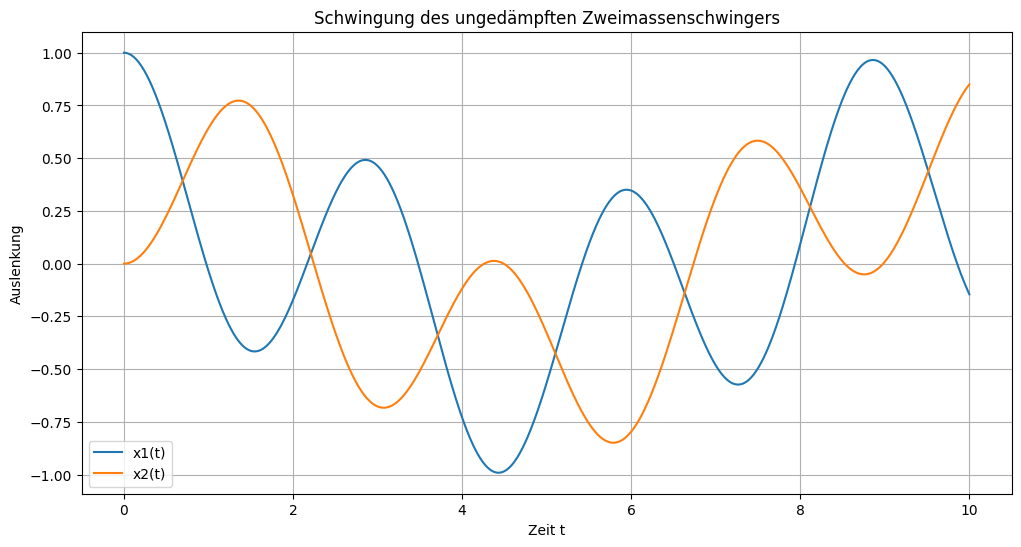

In [60]:
# Ergebnisse plotten
plt.figure(figsize=(12, 6))
plt.plot(t, x1, label='x1(t)')
plt.plot(t, x2, label='x2(t)')
plt.xlabel('Zeit t')
plt.ylabel('Auslenkung')
plt.title('Schwingung des ungedämpften Zweimassenschwingers')
plt.legend()
plt.grid()
plt.show()

In [61]:

# Differentialgleichungen des ungedämpften Zweimassenschwingers
def zweimassenschwinger(t, y, omega01, omega02):
    x1, x2, v1, v2 = y
    dx1dt = v1
    dx2dt = v2
    dv1dt = - (omega01 + omega02) * x1 + omega02 * x2
    dv2dt = omega02 * x1 - omega02 * x2
    return [dx1dt, dx2dt, dv1dt, dv2dt]

print(zweimassenschwinger(1000,[15,9,7,3],9,10))


[7, 3, -195, 60]
